## Import csv files into SQL database
```
jeremydai ~ $  cd /Users/jeremydai/Dropbox/Udacity_Project/OpenStreetMap
jeremydai OpenStreetMap $ sqlite3
SQLite version 3.13.0 2016-05-18 10:57:30
Enter ".help" for usage hints.
Connected to a transient in-memory database.
Use ".open FILENAME" to reopen on a persistent database.
sqlite> .open houston.db
sqlite> .read data_wrangling_schema.sql
sqlite> .tables
nodes       nodes_tags  ways        ways_nodes  ways_tags 
sqlite> .mode csv
sqlite> .import nodes.csv nodes
sqlite> .import nodes_tags.csv nodes_tags
sqlite> .import ways.csv ways
sqlite> .import ways_nodes.csv ways_nodes
sqlite> .import ways_tags.csv ways_tags

```



## Database Query

In [43]:
import sqlite3
db = sqlite3.connect("/Users/jeremydai/Dropbox/Udacity_Project/OpenStreetMap/houston.db")
c = db.cursor()

In [44]:
# Number of Nodes
c.execute("select count(*) from nodes;")
c.fetchall()[0][0]

3486397

In [45]:
# Number of Ways
c.execute("select count(*) from ways;")
c.fetchall()[0][0]

441328

In [47]:
# Number of unique users
query = '''
select count(distinct user.uid) as n
from (select uid from nodes UNION ALL select uid from ways) as user
'''
c.execute(query)
n_users=c.fetchall()[0][0]
print n_users

1978


In [48]:
query = '''
SELECT u.uid, count(*) as n
FROM (select uid from nodes UNION ALL select uid from ways) as u
GROUP BY uid
ORDER BY n DESC
LIMIT 10;
'''
c.execute(query)
print 'u.uid', 'count'
contri=0
for row in c:
    print row
    contri+=row[1]

print 'Top 10 users contribute', contri,'items of nodes and ways'

query = '''
SELECT count(*) as n
FROM (select uid from nodes UNION ALL select uid from ways) as u
;
'''
c.execute(query)
total=c.fetchall()[0][0]

print 'They,',round(float(1000)/n_users,2), '% of total users, contribute', contri*100/total,'% of nodes and ways'

u.uid count
(147510, 556989)
(672878, 536682)
(1110270, 485675)
(496606, 203246)
(3119079, 193609)
(119881, 137301)
(9065, 115728)
(243003, 86031)
(475877, 81047)
(37392, 58765)
Top 10 users contribute 2455073 items of nodes and ways
They, 0.51 % of total users, contribute 62 % of nodes and ways


In [49]:
#contributions per person histogram
query = '''
SELECT count(*) as n
FROM (select uid from nodes UNION ALL select uid from ways) as u
GROUP BY uid
'''
c.execute(query)

contri_list=[]
for row in c:
    contri_list.append(row[0])


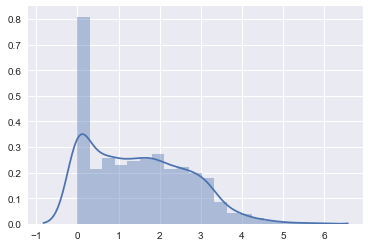

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
sns.distplot(np.log10(contri_list),kde=True)

In [50]:
query = '''
SELECT value, COUNT(*) as num
FROM nodes_tags
WHERE key='amenity'
GROUP BY value
ORDER BY num DESC
LIMIT 10;
'''
c.execute(query)
for row in c:
    print row

(u'place_of_worship', 2194)
(u'school', 799)
(u'fountain', 722)
(u'restaurant', 700)
(u'fast_food', 636)
(u'fire_station', 349)
(u'fuel', 281)
(u'pharmacy', 176)
(u'bank', 172)
(u'police', 160)


In [51]:
query = '''
SELECT a.value, COUNT(*) as num
FROM nodes_tags as a, 
    (SELECT DISTINCT(id) FROM nodes_tags WHERE value='place_of_worship') as b
WHERE a.id=b.id
AND a.key='religion'
GROUP BY a.value
ORDER BY num DESC
LIMIT 3;
'''
c.execute(query)
for row in c:
    print row

(u'christian', 2128)
(u'buddhist', 16)
(u'jewish', 12)


In [52]:
query = '''
SELECT a.value, COUNT(*) as num
FROM nodes_tags as a,
    (SELECT DISTINCT(id) FROM nodes_tags WHERE value='restaurant') as b
WHERE a.id=b.id
AND a.key='cuisine'
GROUP BY a.value
ORDER BY num DESC
LIMIT 10;
'''

c.execute(query)
for row in c:
    print row

(u'mexican', 73)
(u'american', 35)
(u'pizza', 35)
(u'italian', 32)
(u'chinese', 28)
(u'seafood', 21)
(u'burger', 19)
(u'barbecue', 16)
(u'sandwich', 13)
(u'thai', 10)


In [75]:
# What are in the nodes tags 
query = '''
SELECT DISTINCT key, COUNT(*) as n
FROM nodes_tags 
GROUP BY key
ORDER BY n DESC;
'''
c.execute(query)
for row in c:
    print row

(u'highway', 37651)
(u'power', 29894)
(u'name', 11442)
(u'amenity', 8094)
(u'ele', 5367)
(u'feature_id', 4914)
(u'railway', 4588)
(u'created', 4098)
(u'state_id', 3719)
(u'county_id', 3718)
(u'housenumber', 2882)
(u'street', 2814)
(u'city', 2678)
(u'state', 2511)
(u'postcode', 2261)
(u'natural', 2232)
(u'religion', 2171)
(u'crossing', 1965)
(u'barrier', 1915)
(u'created_by', 1839)
(u'source', 1804)
(u'shop', 1431)
(u'building', 1413)
(u'material', 1384)
(u'denomination', 1329)
(u'import_uuid', 1257)
(u'county_name', 1188)
(u'place', 1169)
(u'cuisine', 965)
(u'reviewed', 788)
(u'noexit', 771)
(u'tourism', 757)
(u'ref', 693)
(u'website', 661)
(u'phone', 631)
(u'leisure', 580)
(u'traffic_signals', 524)
(u'is_in', 514)
(u'class', 453)
(u'county', 453)
(u'id', 452)
(u'st_alpha', 452)
(u'county_num', 451)
(u'st_num', 451)
(u'exit_to', 403)
(u'feature_type', 381)
(u'source_ref', 376)
(u'aeroway', 346)
(u'operator', 317)
(u'opening_hours', 309)
(u'emergency', 274)
(u'foot', 241)
(u'landuse', 2

In [80]:
# What are in the ways tags 
query = '''
SELECT DISTINCT key, COUNT(*) as n
FROM ways_tags 
GROUP BY key
ORDER BY n DESC;
'''
c.execute(query)
for row in c:
    print row

(u'highway', 281825)
(u'county', 164036)
(u'cfcc', 163022)
(u'reviewed', 135616)
(u'building', 110847)
(u'street', 110226)
(u'name_type', 94504)
(u'source', 90340)
(u'tlid', 71842)
(u'zip_left', 71749)
(u'zip_right', 67196)
(u'separated', 65311)
(u'oneway', 51782)
(u'name', 47668)
(u'service', 41148)
(u'upload_uuid', 33226)
(u'surface', 27063)
(u'lanes', 24296)
(u'name_base_1', 15167)
(u'access', 12707)
(u'ref', 11317)
(u'amenity', 9385)
(u'layer', 7781)
(u'name_type_1', 7689)
(u'name_1', 7396)
(u'landuse', 7352)
(u'bridge', 7226)
(u'railway', 7112)
(u'natural', 6408)
(u'gauge', 6155)
(u'leisure', 5932)
(u'city', 4817)
(u'state', 4482)
(u'maxspeed', 3941)
(u'old_ref', 3714)
(u'waterway', 3459)
(u'zip_left_1', 3354)
(u'foot', 3221)
(u'housenumber', 3175)
(u'bicycle', 3020)
(u'sport', 2582)
(u'operator', 2576)
(u'postcode', 2477)
(u'footway', 2297)
(u'note', 2242)
(u'name_base_2', 2175)
(u'power', 2108)
(u'is_in', 2062)
(u'hgv', 1858)
(u'parking', 1852)
(u'voltage', 1733)
(u'frequency', 

In [90]:
#Most Popular Leisure types
query = '''
SELECT a.value, COUNT(*) as n
FROM (SELECT key, value FROM nodes_tags UNION ALL SELECT key, value FROM ways_tags) as a
WHERE a.key ='leisure'
GROUP BY a.value
ORDER BY n DESC
Limit 10;
'''

c.execute(query)
for row in c:
    print row

(u'pitch', 2503)
(u'swimming_pool', 1322)
(u'park', 1258)
(u'playground', 773)
(u'sports_centre', 135)
(u'golf_course', 85)
(u'garden', 75)
(u'stadium', 69)
(u'track', 68)
(u'picnic_table', 59)


In [87]:
#Natural?
query = '''
SELECT a.value, COUNT(*) as n
FROM (SELECT key, value FROM nodes_tags UNION ALL SELECT key, value FROM ways_tags) as a
WHERE a.key ='natural'
GROUP BY a.value
ORDER BY n DESC
Limit 10;
'''

c.execute(query)
for row in c:
    print row

(u'water', 3881)
(u'tree', 2032)
(u'wood', 1282)
(u'sand', 465)
(u'coastline', 429)
(u'wetland', 185)
(u'tree_row', 119)
(u'scrub', 79)
(u'bay', 56)
(u'beach', 43)


In [ ]:
#Most popular shops
query = '''
SELECT DISTINCT value, COUNT(*) as n
FROM nodes_tags 
WHERE key ='shop'
GROUP BY value
ORDER BY n DESC
Limit 10;
'''
c.execute(query)
for row in c:
    print row

In [54]:
# top street names
query = '''
SELECT value, COUNT(*) as num
FROM nodes_tags
WHERE key='street'
GROUP BY value
ORDER BY num DESC
LIMIT 1;
'''
c.execute(query)
for row in c:
    print row

(u'Jason Street', 94)
(u'Kingwood Drive', 84)
(u'Holly Street', 71)
(u'Braesvalley Drive', 56)
(u'Jackwood Street', 51)
(u'Imogene Street', 50)
(u'NASA Parkway', 50)
(u'North Braeswood Boulevard', 49)
(u'Westheimer Road', 47)
(u'Indigo Street', 37)


In [72]:
#explore these streets
query = '''
SELECT b.value,a.value,COUNT(a.value) as num
FROM nodes_tags as a,
    (SELECT DISTINCT(id),value FROM nodes_tags WHERE key = 'street' and value IN 
    ('Jason Street','Kingwood Drive')) as b
WHERE (a.key='name' or a.key='building')
AND a.id =b.id
GROUP BY a.value
ORDER BY num DESC;

'''
c.execute(query)
for row in c:
    print row


(u'Jason Street', u'house', 93)
(u'Kingwood Drive', u'Randalls Pharmacy', 2)
(u'Kingwood Drive', u'TGF Haircutters', 2)
(u'Kingwood Drive', u'Amegy Bank', 1)
(u'Kingwood Drive', u'Baskin Robbins', 1)
(u'Kingwood Drive', u'Bike Werks', 1)
(u'Kingwood Drive', u"Carrabba's Italian Grill", 1)
(u'Kingwood Drive', u'Chase', 1)
(u'Kingwood Drive', u'Chelsea Deli & Cafe', 1)
(u'Kingwood Drive', u"Chico's", 1)
(u'Kingwood Drive', u"Children's Place", 1)
(u'Kingwood Drive', u"Cici's Pizza", 1)
(u'Kingwood Drive', u'Cold Stone Creamery', 1)
(u'Kingwood Drive', u'Cyrese & Co', 1)
(u'Kingwood Drive', u'Darque Tan', 1)
(u'Kingwood Drive', u"Dickey's Barbeque Pit", 1)
(u'Kingwood Drive', u"Domino's Pizza", 1)
(u'Kingwood Drive', u'Edward Jones Financial Office', 1)
(u'Kingwood Drive', u'Embody Fitness Center', 1)
(u'Kingwood Drive', u'Eye Level Kingwood-West', 1)
(u'Kingwood Drive', u'Farmers Insurance', 1)
(u'Kingwood Drive', u'Fouette Dancewear', 1)
(u'Kingwood Drive', u'GameStop', 1)
(u'Kingwood D

In [ ]:
db.close()